### Importing Libraries

In [3010]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importing train set and target values and merging them into a third dataset for EDA

In [3011]:
train_features=pd.read_csv("C:/Users/rehan/Downloads/dataset and all/training_set_features.csv")
train_targets=pd.read_csv("C:/Users/rehan/Downloads/dataset and all/training_set_labels.csv")
test_features=pd.read_csv("C:/Users/rehan/Downloads/dataset and all/test_set_features.csv")
train_set=train_features.merge(train_targets,how='left')
test_features.isna().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [3012]:
train_targets.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [3013]:
train_set.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### EDA:

xyz_concern
2.0    23.385343
1.0    17.134797
3.0    29.209323
0.0    13.561893
Name: count, dtype: float64
xyz_concern
2.0    76.614657
1.0    82.865203
3.0    70.790677
0.0    86.438107
Name: count, dtype: float64


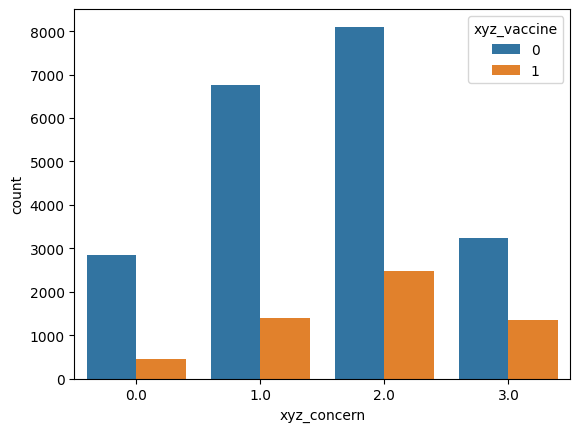

In [3014]:
total_count=train_set["xyz_concern"].value_counts()
sns.countplot(data=train_set,x="xyz_concern", hue="xyz_vaccine")
count_concern_yes=train_set[train_set["xyz_vaccine"]==1]["xyz_concern"].value_counts()
count_concern_no=train_set[train_set["xyz_vaccine"]==0]["xyz_concern"].value_counts()
percentage_concern_yes=count_concern_yes/total_count*100
percentage_concern_no=count_concern_no/total_count*100
print(percentage_concern_yes)
print(percentage_concern_no)

This suggests that even though exact counts can be misleading, the percentage of people taking xyz_vaccine go up with increasing concern.

xyz_knowledge
1.0    18.173722
2.0    27.806472
0.0    14.405427
Name: count, dtype: float64
xyz_knowledge
1.0    81.826278
2.0    72.193528
0.0    85.594573
Name: count, dtype: float64


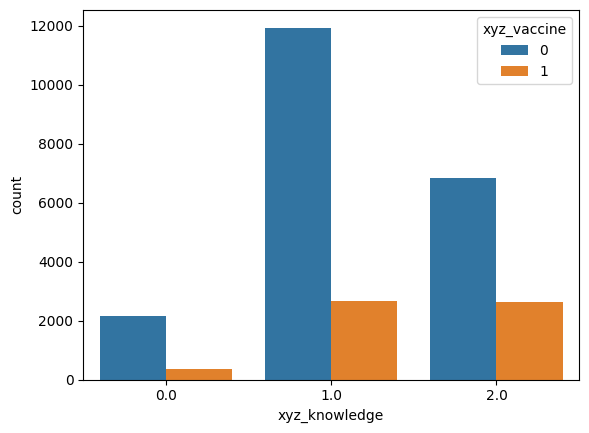

In [3015]:
total_count=train_set["xyz_knowledge"].value_counts()
sns.countplot(data=train_set,x="xyz_knowledge", hue="xyz_vaccine")
count_knowledge_yes=train_set[train_set["xyz_vaccine"]==1]["xyz_knowledge"].value_counts()
count_knowledge_no=train_set[train_set["xyz_vaccine"]==0]["xyz_knowledge"].value_counts()
percentage_knowledge_yes=count_knowledge_yes/total_count*100
percentage_knowledge_no=count_knowledge_no/total_count*100
print(percentage_knowledge_yes)
print(percentage_knowledge_no)

Similar trend

# Taking care of Null values

In [3016]:
# Counting null values in each column
train_set.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [3017]:
train_set.drop(['respondent_id','health_insurance','employment_industry','employment_occupation','hhs_geo_region',"opinion_xyz_risk",'opinion_seas_risk'],axis=1,inplace=True)
test_features.drop(['respondent_id','health_insurance','employment_industry','employment_occupation','hhs_geo_region',"opinion_xyz_risk",'opinion_seas_risk'],axis=1,inplace=True)
train_set.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [3018]:
train_set["doctor_recc_seasonal"]=train_set["doctor_recc_seasonal"].fillna(train_set["seasonal_vaccine"])
train_set["doctor_recc_xyz"]=train_set["doctor_recc_xyz"].fillna(train_set["xyz_vaccine"])
train_set["xyz_knowledge"]=train_set["xyz_knowledge"].fillna(0)
train_set["xyz_concern"]=train_set["xyz_concern"].fillna(train_set["xyz_knowledge"])

train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"income_poverty"]=train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"income_poverty"].fillna("> $75,000")
train_set["income_poverty"]=train_set["income_poverty"].fillna("<= $75,000, Above Poverty")

train_set["behavioral_antiviral_meds"]=train_set["behavioral_antiviral_meds"].fillna(0)

train_set["behavioral_avoidance"]=train_set["behavioral_avoidance"].fillna(train_set["xyz_vaccine"])
train_set["behavioral_face_mask"]=train_set["behavioral_face_mask"].fillna(train_set["xyz_vaccine"])
train_set["behavioral_wash_hands"]=train_set["behavioral_wash_hands"].fillna(train_set["xyz_vaccine"])
train_set["behavioral_large_gatherings"]=train_set["behavioral_large_gatherings"].fillna(train_set["xyz_vaccine"])
train_set["behavioral_outside_home"]=train_set["behavioral_outside_home"].fillna(train_set["xyz_vaccine"])
train_set["behavioral_touch_face"]=train_set["behavioral_touch_face"].fillna(train_set["xyz_vaccine"])
train_set["child_under_6_months"]=train_set["child_under_6_months"].fillna(train_set["xyz_vaccine"])

train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"chronic_med_condition"]=train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"chronic_med_condition"].fillna(1)
train_set["chronic_med_condition"]=train_set["chronic_med_condition"].fillna(0)

train_set.loc[((train_set["seasonal_vaccine"]==1)),"health_worker"]=train_set.loc[((train_set["seasonal_vaccine"]==1)),"health_worker"].fillna(train_set["seasonal_vaccine"])
train_set["health_worker"]=train_set["health_worker"].fillna(train_set["xyz_vaccine"])

train_set.loc[((train_set["xyz_vaccine"]==1)),"opinion_xyz_vacc_effective"]=train_set.loc[((train_set["xyz_vaccine"]==1)),"opinion_xyz_vacc_effective"].fillna(5)
train_set["opinion_xyz_vacc_effective"]=train_set["opinion_xyz_vacc_effective"].fillna(1)

train_set.loc[((train_set["xyz_vaccine"]==1)),"opinion_xyz_sick_from_vacc"]=train_set.loc[((train_set["xyz_vaccine"]==1)),"opinion_xyz_sick_from_vacc"].fillna(1)
train_set["opinion_xyz_sick_from_vacc"]=train_set["opinion_xyz_sick_from_vacc"].fillna(5)

train_set.loc[((train_set["seasonal_vaccine"]==1)),"opinion_seas_vacc_effective"]=train_set.loc[((train_set["seasonal_vaccine"]==1)),"opinion_seas_vacc_effective"].fillna(5)
train_set["opinion_seas_vacc_effective"]=train_set["opinion_seas_vacc_effective"].fillna(1)

train_set.loc[((train_set["seasonal_vaccine"]==1)),"opinion_seas_sick_from_vacc"]=train_set.loc[((train_set["seasonal_vaccine"]==1)),"opinion_seas_sick_from_vacc"].fillna(1)
train_set["opinion_seas_sick_from_vacc"]=train_set["opinion_seas_sick_from_vacc"].fillna(5)

train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"education"]=train_set.loc[((train_set["seasonal_vaccine"]==1) | (train_set["xyz_vaccine"]==1)),"education"].fillna("College Graduate")
train_set["education"]=train_set["education"].fillna("< 12 Years")

train_set.loc[((train_set["xyz_vaccine"]==1)),"marital_status"]=train_set.loc[((train_set["xyz_vaccine"]==1)),"marital_status"].fillna("Married")
train_set.loc[((train_set["xyz_vaccine"]==0)),"marital_status"]=train_set.loc[((train_set["xyz_vaccine"]==0)),"marital_status"].fillna("Not Married")

train_set.loc[((train_set["seasonal_vaccine"]==1)),"rent_or_own"]=train_set.loc[((train_set["seasonal_vaccine"]==1)),"rent_or_own"].fillna("Own")
train_set.loc[((train_set["seasonal_vaccine"]==0)),"rent_or_own"]=train_set.loc[((train_set["seasonal_vaccine"]==0)),"rent_or_own"].fillna("Rent")

train_set.loc[((train_set["seasonal_vaccine"]==1)),"employment_status"]=train_set.loc[((train_set["seasonal_vaccine"]==1)),"employment_status"].fillna("Not in Labor Force")
train_set.loc[((train_set["seasonal_vaccine"]==0)),"employment_status"]=train_set.loc[((train_set["seasonal_vaccine"]==0)),"employment_status"].fillna("Employed")

train_set["household_adults"]=train_set["household_adults"].fillna(2)
train_set["household_children"]=train_set["household_children"].fillna(2)


#Clean test set:

test_features.loc[((test_features["income_poverty"]=="<= $75,000, Above Poverty")),"chronic_med_condition"]=test_features.loc[((test_features["income_poverty"]=="<= $75,000, Above Poverty")),"chronic_med_condition"].fillna(1)
test_features.loc[((test_features["income_poverty"]=="Below Poverty")),"chronic_med_condition"]=test_features.loc[((test_features["income_poverty"]=="Below Poverty")),"chronic_med_condition"].fillna(1)
test_features["chronic_med_condition"]=test_features["chronic_med_condition"].fillna(0)

test_features["doctor_recc_xyz"]=test_features["doctor_recc_xyz"].fillna(test_features["chronic_med_condition"])
test_features["doctor_recc_seasonal"]=test_features["doctor_recc_seasonal"].fillna(test_features["chronic_med_condition"])

test_features.loc[((test_features["education"]=="College Graduate")),"income_poverty"]=test_features.loc[((test_features["education"]=="College Graduate")),"income_poverty"].fillna("<= $75,000, Above Poverty")
test_features.loc[((test_features["education"]=="Some College")),"income_poverty"]=test_features.loc[((test_features["education"]=="Some College")),"income_poverty"].fillna("> $75,000")
test_features.loc[((test_features["education"]=="< 12 Years")),"income_poverty"]=test_features.loc[((test_features["education"]=="< 12 Years")),"income_poverty"].fillna("Below Poverty")
test_features["income_poverty"]=test_features["income_poverty"].fillna("<= $75,000, Above Poverty")

test_features["household_adults"]=test_features["household_adults"].fillna(1)
test_features["household_children"]=test_features["household_children"].fillna(1)
test_features["child_under_6_months"]=test_features["child_under_6_months"].fillna(0)
test_features["xyz_concern"]=test_features["xyz_concern"].fillna(2)
test_features["xyz_knowledge"]=test_features["xyz_knowledge"].fillna(1)

In [3019]:
test_features.isna().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                    0
marital_status                 1442
rent_or_own                    2036
employment_status              1471
census_msa                        0
household_adults            

Test cases cleaning:

In [3020]:
modes = test_features.mode().iloc[0]
test_features = test_features.fillna(modes)

In [3021]:
# To both models we will use following training set:
training_set=train_set.drop(["xyz_vaccine","seasonal_vaccine"],axis=1)
# and following tests:
train_target_set_1=train_set["xyz_vaccine"]
train_target_set_2=train_set["seasonal_vaccine"]

In [3022]:
training_set.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


<Axes: xlabel='income_poverty', ylabel='count'>

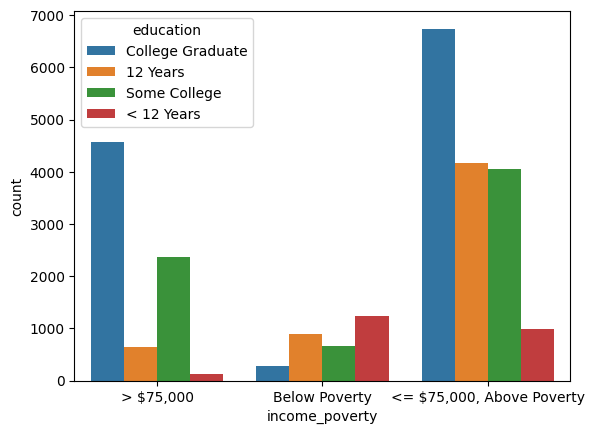

In [3023]:
############## To be deleted
sns.countplot(data=test_features,x="income_poverty",hue="education")

In [3024]:

print(training_set.iloc[:,18:27].info())
df1=pd.get_dummies(training_set.iloc[:,18:27],dtype=float)
df2=pd.get_dummies(test_features.iloc[:,18:27],dtype=float)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age_group          26707 non-null  object
 1   education          26707 non-null  object
 2   race               26707 non-null  object
 3   sex                26707 non-null  object
 4   income_poverty     26707 non-null  object
 5   marital_status     26707 non-null  object
 6   rent_or_own        26707 non-null  object
 7   employment_status  26707 non-null  object
 8   census_msa         26707 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB
None


,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3025]:
# training_set=pd.concat([training_set.iloc[:,:18],df1],axis=1)
# training_set.head(20)
# y_train_xyz = train_target_set_1.to_numpy()
# y_train_xyz

In [3026]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# clf = LogisticRegression()
# scaler = StandardScaler()

# training_set=pd.concat([training_set.iloc[:,:18],df1],axis=1)
# test_features=pd.concat([test_features.iloc[:,:18],df2],axis=1)

# training_scaled=scaler.fit_transform(training_set)
# testing_scaled=scaler.transform(test_features)

# X_train1, X_test1, y_train1, y_test1 = train_test_split(training_scaled, train_target_set_1, test_size=0.4, random_state=42)

# clf.fit(X_train1, y_train1)

# prob_xyz = clf.predict_proba(X_test1)
# prob_xyz

# X_train2, X_test2, y_train2, y_test2 = train_test_split(training_scaled, train_target_set_2, test_size=0.4, random_state=42)

# clf2 = LogisticRegression()
# clf2.fit(X_train2, y_train2)

# prob_seas = clf2.predict_proba(X_test2)
# prob_seas

# xyz_vaccine = prob_xyz[:,1]
# seasonal_vaccine = prob_seas[:,1]
# respondent_id = np.arange(26707, len(xyz_vaccine)+26707)
                          
# df2 = pd.DataFrame({'respondent_id':respondent_id, 'xyz_vaccine':xyz_vaccine, 'seasonal_vaccine':seasonal_vaccine})
# df2.head()        

# # df2.to_csv('Hackathon1.csv', index=False)
# xyz_vaccine = prob_xyz[:,1]
# seasonal_vaccine = prob_seas[:,1]

# auc_score = roc_auc_score(y_test2,seasonal_vaccine)
# print(auc_score)


# Now we get to making model

In [3027]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
clf = LogisticRegression()
scaler = MinMaxScaler()

training_set=pd.concat([training_set.iloc[:,:18],df1],axis=1)
test_features=pd.concat([test_features.iloc[:,:18],df2],axis=1)

training_scaled=scaler.fit_transform(training_set)
testing_scaled=scaler.transform(test_features)

y_train_xyz = train_target_set_1.to_numpy()

clf.fit(training_scaled, y_train_xyz)

prob_xyz = clf.predict_proba(testing_scaled)
prob_xyz

y_train_seas = train_target_set_2.to_numpy()

clf2 = LogisticRegression()
clf2.fit(training_scaled, y_train_seas)

prob_seas = clf2.predict_proba(testing_scaled)
prob_seas

xyz_vaccine = prob_xyz[:,1]
seasonal_vaccine = prob_seas[:,1]
respondent_id = np.arange(26707, len(xyz_vaccine)+26707)
                          
df2 = pd.DataFrame({'respondent_id':respondent_id, 'xyz_vaccine':xyz_vaccine, 'seasonal_vaccine':seasonal_vaccine})
df2.head()        

df2.to_csv('Hackathon_new.csv', index=False)
